#Etapa 1: Análise Descritiva

In [14]:
import pandas as pd

platforms = pd.read_csv("MKT.csv", sep=",")
pd.options.display.float_format = '{:,.2f}'.format
display(platforms)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [15]:
platforms.info()
#Através das informações da tabela é possível observar que não existem valores nulos
#os tipos dos dados são float o que para valor númerico esta correto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [16]:
display(platforms[platforms.duplicated()])
#Verificando se existem linhas com valores duplicados, nesse caso não temos duplicados

,youtube,facebook,newspaper,sales


#Etapa 2: Análise Exploratória

In [17]:
platforms.describe()
#Através da descrição das variáveis é possivel observar que não existem outliers, pois o desvio padrão não é maior que a média


,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


In [18]:
import seaborn as sns

<Axes: >

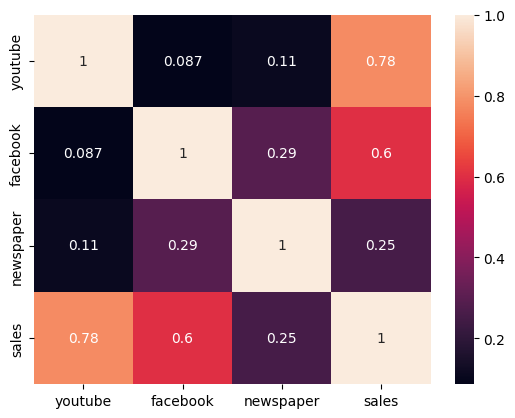

In [19]:
sns.heatmap(platforms.corr(), annot=True)
#Se realizarmos uma análise de correlação entre as nossas variáveis
#conseguimos observar que a plataforma que tem maior correlação com as vendas é o youtube e o newspaper o que tem a menor correlação

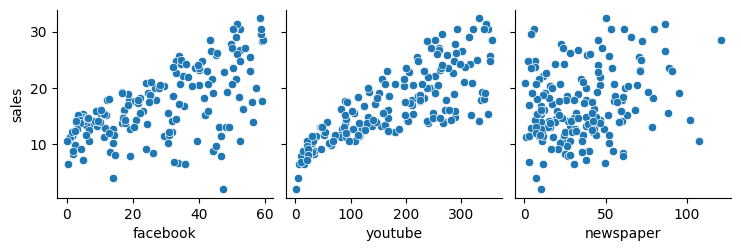

In [20]:
sns.pairplot(platforms, x_vars=['facebook', 'youtube', 'newspaper'], y_vars='sales')

#Atraves desse gráfico é possivel observar que apenas o youtube tem uma lineariedade mais coerente com as vendas


In [21]:
platforms.query("youtube > 262").sort_values(ascending=False,by='youtube').head()

,youtube,facebook,newspaper,sales
72,355.68,43.56,121.08,28.56
13,352.32,33.24,2.16,24.84
1,351.48,33.96,51.84,25.68
6,348.84,4.92,10.20,15.36
69,347.64,50.76,61.44,30.48


In [22]:
platforms.query("sales > 20").sort_values(ascending=False, by='sales').head()
#Conseguimos observar que o youtube é o que tem maior influência no número de vendas,
#porém ainda assim é um retorno bem baixo considerando o valor do investimento

,youtube,facebook,newspaper,sales
146,332.28,58.68,50.16,32.40
154,345.12,51.60,86.16,31.44
169,340.32,50.40,79.44,30.60
69,347.64,50.76,61.44,30.48
118,291.84,58.80,53.16,30.48


<Axes: xlabel='sales', ylabel='Count'>

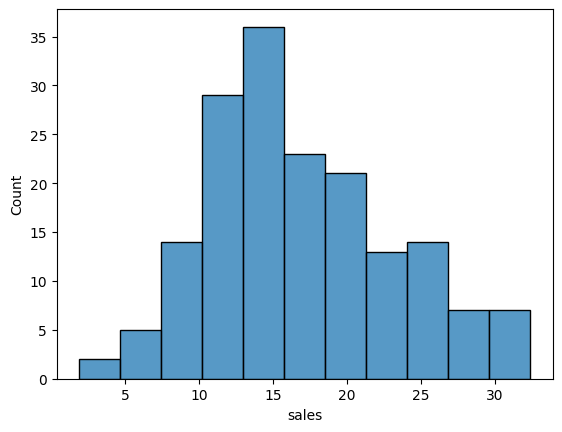

In [23]:
sns.histplot(platforms['sales'])

#Etapa 3: Modelagem

In [24]:
from sklearn.model_selection import train_test_split

#variaveis independentes
x = platforms.drop(['sales'], axis=1)

#variavel resposta
y = platforms['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=45)
#Criando a base de treino com 70% da base original e os outros 30% como teste

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Resolvi testar 4 modelos de regressão para ver qual conseguia se sair melhor nas predições
models = {
  'Regressão Linear': LinearRegression(),
  'Árvore de Decisão': DecisionTreeRegressor(),
  'Random Forest': RandomForestRegressor(),
  'XBG': XGBRegressor()
}

for model_name, model in models.items():
  model.fit(x_train, y_train)
  print(f'{model_name} treinado.')

Regressão Linear treinado.
Árvore de Decisão treinado.
Random Forest treinado.
XBG treinado.


#Etapa 4: Calculando Predição

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

results = {}
absolut_error = {}

#Realizando as predições e ja calculando o R² e MAE
for model_name, model in models.items():
  y_pred = model.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  results[model_name] = r2
  absolut_error[model_name] = mae

for model_name in results:
  print(f'{model_name}: R² = {results[model_name]:.4f}, MAE = {absolut_error[model_name]:.4f}')


#E de acordo com o calculo de precisão R² o que consegue acertar mais predições da base de testes e o modelo XBG com 97% de pontuação
#Resolvi calcular também o erro absoluto médio de cada modelo e como esperado o que teve o menor valor foi o XBG

Regressão Linear: R² = 0.8797, MAE = 1.6386
Árvore de Decisão: R² = 0.9503, MAE = 1.2646
Random Forest: R² = 0.9651, MAE = 0.9705
XBG: R² = 0.9711, MAE = 0.9089


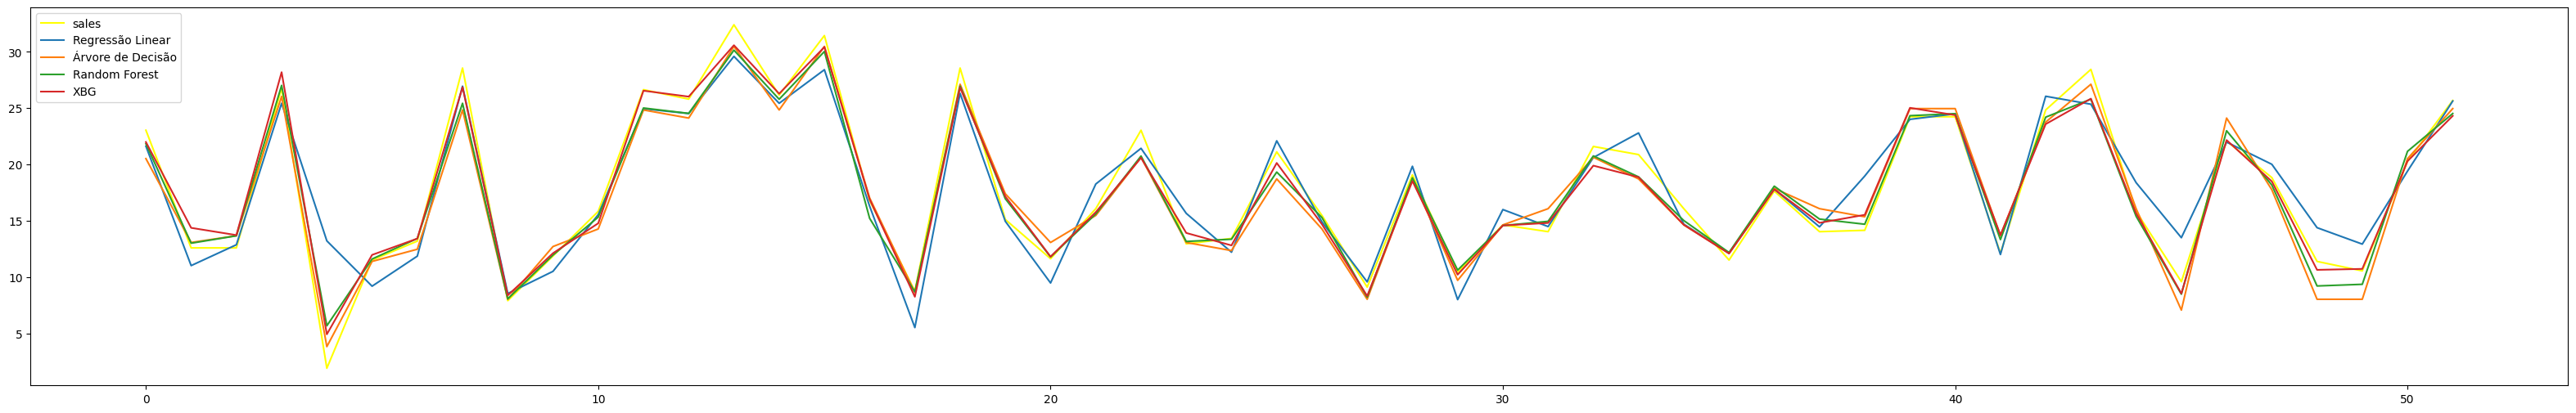

In [27]:
import matplotlib.pyplot as plt

c = [i for i in range(0,52)]
plt.figure(figsize=(40,6))
plt.plot(c, y_test, color='yellow', label='sales')
for model_name, model in models.items():
  y_pred = model.predict(x_test)
  plt.plot(c, y_pred, label=model_name)
plt.legend()
plt.show()
#Aqui conseguimos observar claramente a porcentagem de precisão da previsão de cada modelo com os valores reais
#e o de XBG é oque mais se aproxima das respostas

In [28]:
#Aqui podemos fazer a previsão das vendas conforme o investimento em cada plataforma

youtube = float(input("Investimento YouTube: "))
facebook = float(input("Investimento Facebook: "))
newspaper = float(input("Investimento Newspaper: "))

prediction = [[youtube, facebook, newspaper]]
sales = models['XBG'].predict(prediction)[0]

print(f'\nsales = {sales:.2f}')

Investimento YouTube: 130
Investimento Facebook: 50
Investimento Newspaper: 50

sales = 18.70
